<a href="https://colab.research.google.com/github/SUTHIR-V/Infosys_Springboard/blob/main/cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install seaborn
!pip install matplotlib


In [8]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Text(0.5, 1.0, 'Distribution of Cancer Risk Levels')

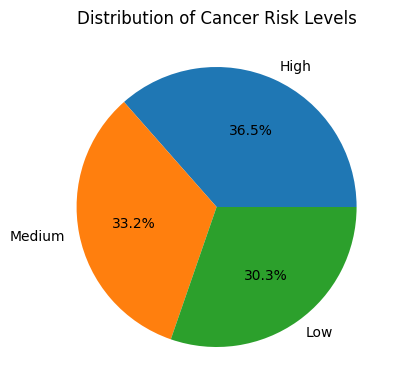

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('cancerdata.csv')

# Create figure
plt.figure(figsize=(15, 10))

# 1. Distribution of Cancer Risk Levels
plt.subplot(2, 2, 1)
level_counts = df['Level'].value_counts()
plt.pie(level_counts, labels=level_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Cancer Risk Levels')

Text(0.5, 1.0, 'Correlation Heatmap of Risk Factors')

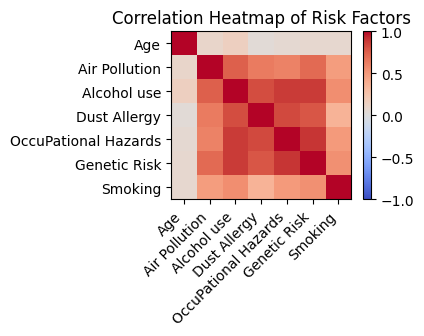

In [17]:
plt.subplot(2, 2, 2)
# Exclude non-numeric columns
numeric_columns = ['Age', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
                   'OccuPational Hazards', 'Genetic Risk', 'Smoking']
correlation_matrix = df[numeric_columns].corr()

plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(numeric_columns)), numeric_columns, rotation=45, ha='right')
plt.yticks(range(len(numeric_columns)), numeric_columns)
plt.title('Correlation Heatmap of Risk Factors')

<ipython-input-18-e5ecca6fbd78>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(age_data, labels=levels)


Text(0, 0.5, 'Age')

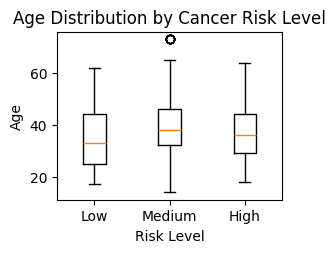

In [18]:
plt.subplot(2, 2, 3)
levels = df['Level'].unique()
age_data = [df[df['Level'] == level]['Age'] for level in levels]
plt.boxplot(age_data, labels=levels)
plt.title('Age Distribution by Cancer Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Age')

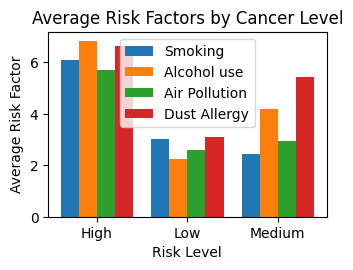

In [19]:
plt.subplot(2, 2, 4)
risk_factors = ['Smoking', 'Alcohol use', 'Air Pollution', 'Dust Allergy']
df_grouped = df.groupby('Level')[risk_factors].mean()

x = np.arange(len(df_grouped.index))
width = 0.2

plt.bar(x - width*1.5, df_grouped['Smoking'], width, label='Smoking')
plt.bar(x - width/2, df_grouped['Alcohol use'], width, label='Alcohol use')
plt.bar(x + width/2, df_grouped['Air Pollution'], width, label='Air Pollution')
plt.bar(x + width*1.5, df_grouped['Dust Allergy'], width, label='Dust Allergy')

plt.xlabel('Risk Level')
plt.ylabel('Average Risk Factor')
plt.title('Average Risk Factors by Cancer Level')
plt.xticks(x, df_grouped.index)
plt.legend()

plt.tight_layout()
plt.savefig('cancer_risk_analysis_matplotlib.png')


In [20]:
print("Risk Level Distribution:")
print(df['Level'].value_counts(normalize=True) * 100)

print("\nAverage Age by Risk Level:")
print(df.groupby('Level')['Age'].mean())

Risk Level Distribution:
Level
High      36.5
Medium    33.2
Low       30.3
Name: proportion, dtype: float64

Average Age by Risk Level:
Level
High      37.320548
Low       35.412541
Medium    38.620482
Name: Age, dtype: float64


In [21]:
gender_risk = pd.crosstab(df['Level'], df['Gender'], normalize='index') * 100
print("\nGender Distribution by Risk Level (%):")
print(gender_risk)


Gender Distribution by Risk Level (%):
Gender          1          2
Level                       
High    69.041096  30.958904
Low     49.174917  50.825083
Medium  59.337349  40.662651
